# Mobility Uber Perú dataset
## About of Uber dataset

This dataset coming from mobility startup that lets any user to book a ride to from any point A to any point B  within the city using a smartphone. Ride value is calculated at the time of request automatically  by the app, considering distance, estimated travel time, and current car availability (demand /  offer balance).

Once the ride ends, we charge passenger's credit card, and transfer X% of this  value to the driver's bank account. Finally, before the passengers gets picked up, the ride can be  cancelled by either the driver or the passenger.

A descriptive data analysis:
* how many? (e.g: vehicles, riders, drivers) 
* when? (e.g: journeys/price/cost per time period, are the journeys quick? 
* what? (e.g: reservations/asap, vehicle type) 
* where? (e.g: origin map, best origins) 
* who? (e.g: worst riders, best drivers) 
* any question you consider interesting 

Disclaimer:
The dataset come from HR technical interview, so the company is real but I don't know if values are real or not. But is good start point to understand how collect some values the carsharing companies as well.

### Comenzamos importando las librerias que vamos a usar

In [1]:
import squarify 
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Configurar estilos
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Leemos el archivo, este archivo CSV usa ";" como separador a diferencia del usual ",", por esto debemos darle un parametro "sep" para reconocer al ";" como separador.

In [3]:
df=pd.read_csv("uber_peru_2010.csv",sep=";")

## 1. Data Processing
El primer trabajo que tenemos que realizar es explorar los datos, entender el contexto para proceder con la limpieza.

In [4]:
df.head(10)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16/11/2010 16:44,"-12,13983536","-77,02355957",16/11/2010 17:29,...,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11/09/2010 23:55,"-12,08995438","-76,92626953",12/09/2010 1:07,...,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0
5,2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,10/08/2010 13:00,"-12,02241898","-77,10650635",10/08/2010 14:26,...,7393.0,1001.0,29080.0,1201.0,5875.0,5175.0,700.0,iPhone,NaN,4.0
6,12432d83b49393bf25164673212b8295,56772d544fdfa589a020a1ff894a86f7,e1332f68e81526e498e4d845233a6d7d,e1332f68e81526e498e4d845235baf80,executive,reserved,08/08/2010 12:10,"-12,08995819","-76,9262085",08/08/2010 12:48,...,7112.0,0.0,27230.0,0.0,5340.0,5340.0,0.0,iPhone,5.0,5.0
7,2e51db3a8a77aa594aa686ff19fe6036,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,16/05/2010 3:58,"-12,11347198","-77,04385376",16/05/2010 4:40,...,5519.0,193.0,17247.0,232.0,4282.0,4139.0,143.0,iPhone,5.0,5.0
8,0234eb5f7e99d581c72052f0a868289c,0234eb5f7e99d581c72052f0a869293a,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,asap,09/07/2010 5:56,"-12,11068311","-77,00212106",09/07/2010 6:37,...,4602.0,78.0,14380.0,94.0,3509.0,3451.0,58.0,Android,0.0,4.0
9,9448070ece760ea5386e5d4822121a6c,dd23cf0ef33ae44e0c0b4c756e1fe4e8,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,asap,22/11/2010 23:42,"-12,08969627","-77,03574926",23/11/2010 0:53,...,2580.0,565.0,8064.0,676.0,2353.0,1935.0,418.0,Android,5.0,5.0


In [5]:
df.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'currency', 'price', 'price_distance', 'price_duration', 'distance',
       'duration', 'cost', 'cost_distance', 'cost_duration', 'source',
       'driver_score', 'rider_score'],
      dtype='object')

In [6]:
df.shape

(23111, 28)

Este datraframe contiene 23111 filas y 28 columnas<br>
Vamos a observar si existen valores nulos en el dataframe, los columnas principales a observar serian (journey_id', 'user_id', 'driver_id')

In [7]:
df[df['driver_id'].isnull()]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
14,3fa8651f453319abccf9760fe64c927e,7d1f317a98447453092aa1301ebae2c5,NaN,NaN,executive,asap,21/06/2010 11:08,"-12,08972168","-77,01724243",21/06/2010 11:11,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
18,16ba39d30594f6050cb8ab702fc41e02,1d6bbc303a2c6584d56322b8cef26f65,NaN,NaN,executive,reserved,07/12/2010 3:00,"-12,0860989","-76,9014698",06/12/2010 21:59,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,web,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,70448b79fbfe8d1e5bdd197b40d0eb35,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,05/06/2010 1:22,"-12,09444046","-77,00198364",05/06/2010 1:22,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8399,dd91e131888064bf7df3ce08f3d4a9d7,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:04,"-12,12453079","-77,02780151",31/05/2010 5:05,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8406,761a1b1e8e4103f2ac5a425564949d9f,54b4de3c953be7d11a1ea3e2b54218dc,NaN,NaN,executive,asap,16/09/2010 18:08,"-12,08783722","-77,06564331",16/09/2010 18:12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
8407,1e44c0fd0a266c3719ff30410b232cff,f728194ffdb461394d105863bc59c5e4,NaN,NaN,executive,asap,22/09/2010 3:42,"-12,1030426","-77,014773",22/09/2010 3:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,web,NaN,NaN


Se puede observar que existen 3385 columnas en las cuales el conductor no está registrado, en este caso no deberiamos eliminar las columnas debido a que si se ha registrado el servicio de taxi,sin embargo, debemos tener este dato en cuenta cuando querramos analizar algo relacionado a los conductores

In [8]:
df[df['user_id'].isnull()]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score


No existen valores nulos para la columna de user_id.

In [9]:
df[df['taxi_id'].isnull()]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
14,3fa8651f453319abccf9760fe64c927e,7d1f317a98447453092aa1301ebae2c5,NaN,NaN,executive,asap,21/06/2010 11:08,"-12,08972168","-77,01724243",21/06/2010 11:11,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
18,16ba39d30594f6050cb8ab702fc41e02,1d6bbc303a2c6584d56322b8cef26f65,NaN,NaN,executive,reserved,07/12/2010 3:00,"-12,0860989","-76,9014698",06/12/2010 21:59,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,web,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,70448b79fbfe8d1e5bdd197b40d0eb35,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,05/06/2010 1:22,"-12,09444046","-77,00198364",05/06/2010 1:22,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8399,dd91e131888064bf7df3ce08f3d4a9d7,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:04,"-12,12453079","-77,02780151",31/05/2010 5:05,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8406,761a1b1e8e4103f2ac5a425564949d9f,54b4de3c953be7d11a1ea3e2b54218dc,NaN,NaN,executive,asap,16/09/2010 18:08,"-12,08783722","-77,06564331",16/09/2010 18:12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
8407,1e44c0fd0a266c3719ff30410b232cff,f728194ffdb461394d105863bc59c5e4,NaN,NaN,executive,asap,22/09/2010 3:42,"-12,1030426","-77,014773",22/09/2010 3:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,web,NaN,NaN


De igual manera encontarmos 3385, es muy probable que los conductores con valores vacios pertenezcan a las mismas filas que los taxis no registrados. Vamos a comprobarlo

In [10]:
df[df[['taxi_id','taxi_id']].isnull().all(1)]

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
14,3fa8651f453319abccf9760fe64c927e,7d1f317a98447453092aa1301ebae2c5,NaN,NaN,executive,asap,21/06/2010 11:08,"-12,08972168","-77,01724243",21/06/2010 11:11,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
18,16ba39d30594f6050cb8ab702fc41e02,1d6bbc303a2c6584d56322b8cef26f65,NaN,NaN,executive,reserved,07/12/2010 3:00,"-12,0860989","-76,9014698",06/12/2010 21:59,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,web,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,70448b79fbfe8d1e5bdd197b40d0eb35,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,05/06/2010 1:22,"-12,09444046","-77,00198364",05/06/2010 1:22,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8399,dd91e131888064bf7df3ce08f3d4a9d7,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:04,"-12,12453079","-77,02780151",31/05/2010 5:05,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
8406,761a1b1e8e4103f2ac5a425564949d9f,54b4de3c953be7d11a1ea3e2b54218dc,NaN,NaN,executive,asap,16/09/2010 18:08,"-12,08783722","-77,06564331",16/09/2010 18:12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN
8407,1e44c0fd0a266c3719ff30410b232cff,f728194ffdb461394d105863bc59c5e4,NaN,NaN,executive,asap,22/09/2010 3:42,"-12,1030426","-77,014773",22/09/2010 3:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,web,NaN,NaN


#### Esta vez verificamos si la combinacion de estas columnas es nula y podemos ver que tambien se obtienen 3385 filas,es decir, que afirmamos nuestra hipótesis de que los conductores con valores vacios pertenezcan a las mismas filas que los taxis no registrados.

Veremos la cantidad de conductores,usuarios y taxis distintos , además debemos no contar los valores nulos.

In [11]:
conductores_dist=df[df['driver_id'].notnull()]['driver_id'].unique().shape[0]
usuarios_dist=df[df['user_id'].notnull()]['user_id'].unique().shape[0]
taxis_dist=df[df['taxi_id'].notnull()]['taxi_id'].unique().shape[0]


In [12]:
print( "Existen {} conductores distintos \nExisten {} usuarios distintos \nExisten {} taxis distintos".format(conductores_dist,usuarios_dist,taxis_dist))



Existen 168 conductores distintos 
Existen 1390 usuarios distintos 
Existen 213 taxis distintos


Como podemos ver existen mas taxis que conductores, esto quiere decir que algunos conductores han usado mas de 2 taxis<br>
Por último observaremos los valores de la columna precio.
Se estará entiendo al precio como la cantidad de soles que paga el cliente y costo la cantidad de soles que se necesitaría para el conductor ofrecer el servicio de taxeado.<br>
Otro punto a tener en cuenta es que se cobra un porcentaje de este valor de precio, la fuente no provee el porcentaje asi que trabajeremos con estos valores directamente.

In [13]:
#Precio
df[df['price'].values<1000]['price'].sample(20)

6698     0.0
8826     0.0
7899     0.0
4107     0.0
6555     0.0
18034    0.0
3714     0.0
7068     0.0
6861     0.0
8627     0.0
12604    0.0
3842     0.0
2714     0.0
3569     0.0
6036     0.0
22425    0.0
17226    0.0
19855    0.0
6229     0.0
305      0.0
Name: price, dtype: float64

Pödemos observar varios ceros, esto quizá se debe a que el sistema no pudo registrar el precio o no se obtuvieron los datos de precio por distancia y duración. Para poder hacer cálculos con los precios debemos contar valores que tengan sentido.Para esto hallaremos la media y varianza del precio

In [14]:
media=df['price'].mean()
varianza=df['price'].var(ddof=0)
print("La media es {}\nLa varianza es {}".format(media,varianza))

La media es 2752.7387839563244
La varianza es 9152583.53934774


Podemos observar un valor exagerado de la varianza esto quizá se debe a los valores 0 o sin sentido, crearemos un nuevo dataframe en el cual solo se consideraran los precios mayores a 1000 y menores de 20000

In [15]:
df[df['price']<1000]['price'].value_counts()

0.0      5101
100.0       2
800.0       1
235.0       1
Name: price, dtype: int64

Se tienen 5101 registros con precio igual a 0, procederemos a eliminarlos y hallar la media y varianza<br>
### De igual manera los precios mayores a 20000 me parecen casos especiales y vamos a omitirlos para el análisis.
También lo haremos para los costos

In [16]:
df_price=df[df['price']>1000]
df_price=df_price[df_price['price']<20000]
df_price=df_price[df_price['cost']>1000]
df_price=df_price[df_price['cost']<20000]

In [17]:
df_price.describe()

,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,driver_score,rider_score
count,12762.000000,1.275100e+04,12751.000000,1.276200e+04,12762.000000,12762.000000,1.269100e+04,12691.000000,5435.000000,11015.000000
mean,3639.517474,3.792840e+03,673.055133,1.330654e+04,812.128898,2817.694484,2.782788e+03,510.129304,3.926403,4.750704
std,2578.144768,5.128211e+04,1428.837126,2.107595e+05,1729.273636,1916.021878,3.797498e+04,1059.826197,1.734947,0.821970
min,1250.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1028.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1700.000000,1.250500e+03,116.000000,3.934250e+03,140.000000,1685.000000,9.130000e+02,91.000000,4.000000,5.000000
50%,2702.500000,2.170000e+03,326.000000,6.820000e+03,395.000000,2017.000000,1.594000e+03,253.000000,5.000000,5.000000
75%,4559.750000,3.886000e+03,723.000000,1.217000e+04,874.000000,3415.000000,2.840500e+03,552.000000,5.000000,5.000000
max,19950.000000,4.491910e+06,69839.000000,1.403722e+07,83807.000000,16625.000000,3.368792e+06,48887.000000,5.000000,5.000000


In [18]:
df_price['price'].max()

19950.0

In [19]:
media=df_price['price'].mean()
varianza=df_price['price'].var(ddof=0)
print("La media es {}\nLa varianza es {}".format(media,varianza))

La media es 3639.5174737501957
La varianza es 6646309.613587475


In [20]:
print("El coeficiente de variación es {}".format(varianza/media))

El coeficiente de variación es 1826.1513130582805


Tenemos un coeficiente de variación muy alto, es decir los datos están muy dispersos.

In [21]:
df_price['price'].value_counts()

1700.0    3341
2200.0      41
2400.0      21
2500.0      21
1628.0      18
          ... 
6027.0       1
9444.0       1
6590.0       1
6613.0       1
4962.0       1
Name: price, Length: 4880, dtype: int64

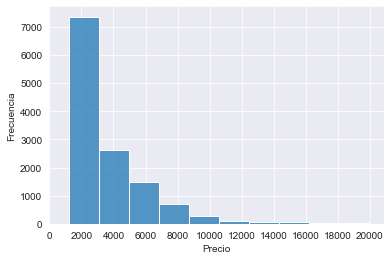

In [22]:
fig, ax = plt.subplots()
sns.histplot(df_price['price'],bins=10)
ax.set_xticks(range(0,20001,2000))
ax.set_xlabel("Precio")
ax.set_ylabel("Frecuencia")
plt.show()

Podemos observar un histograma sesgado a la derecha,es decir se tienen varios valores en el lado izquierdo del eje x a comparación del lado derecho<br>
Finalmente pasaremos copiaremos este dataframe para realizar las siguientes preguntas

In [23]:
df_fix=df_price.copy()

Por último realizaremos una grafica masiva de todas las variables numéricas y observar su relación

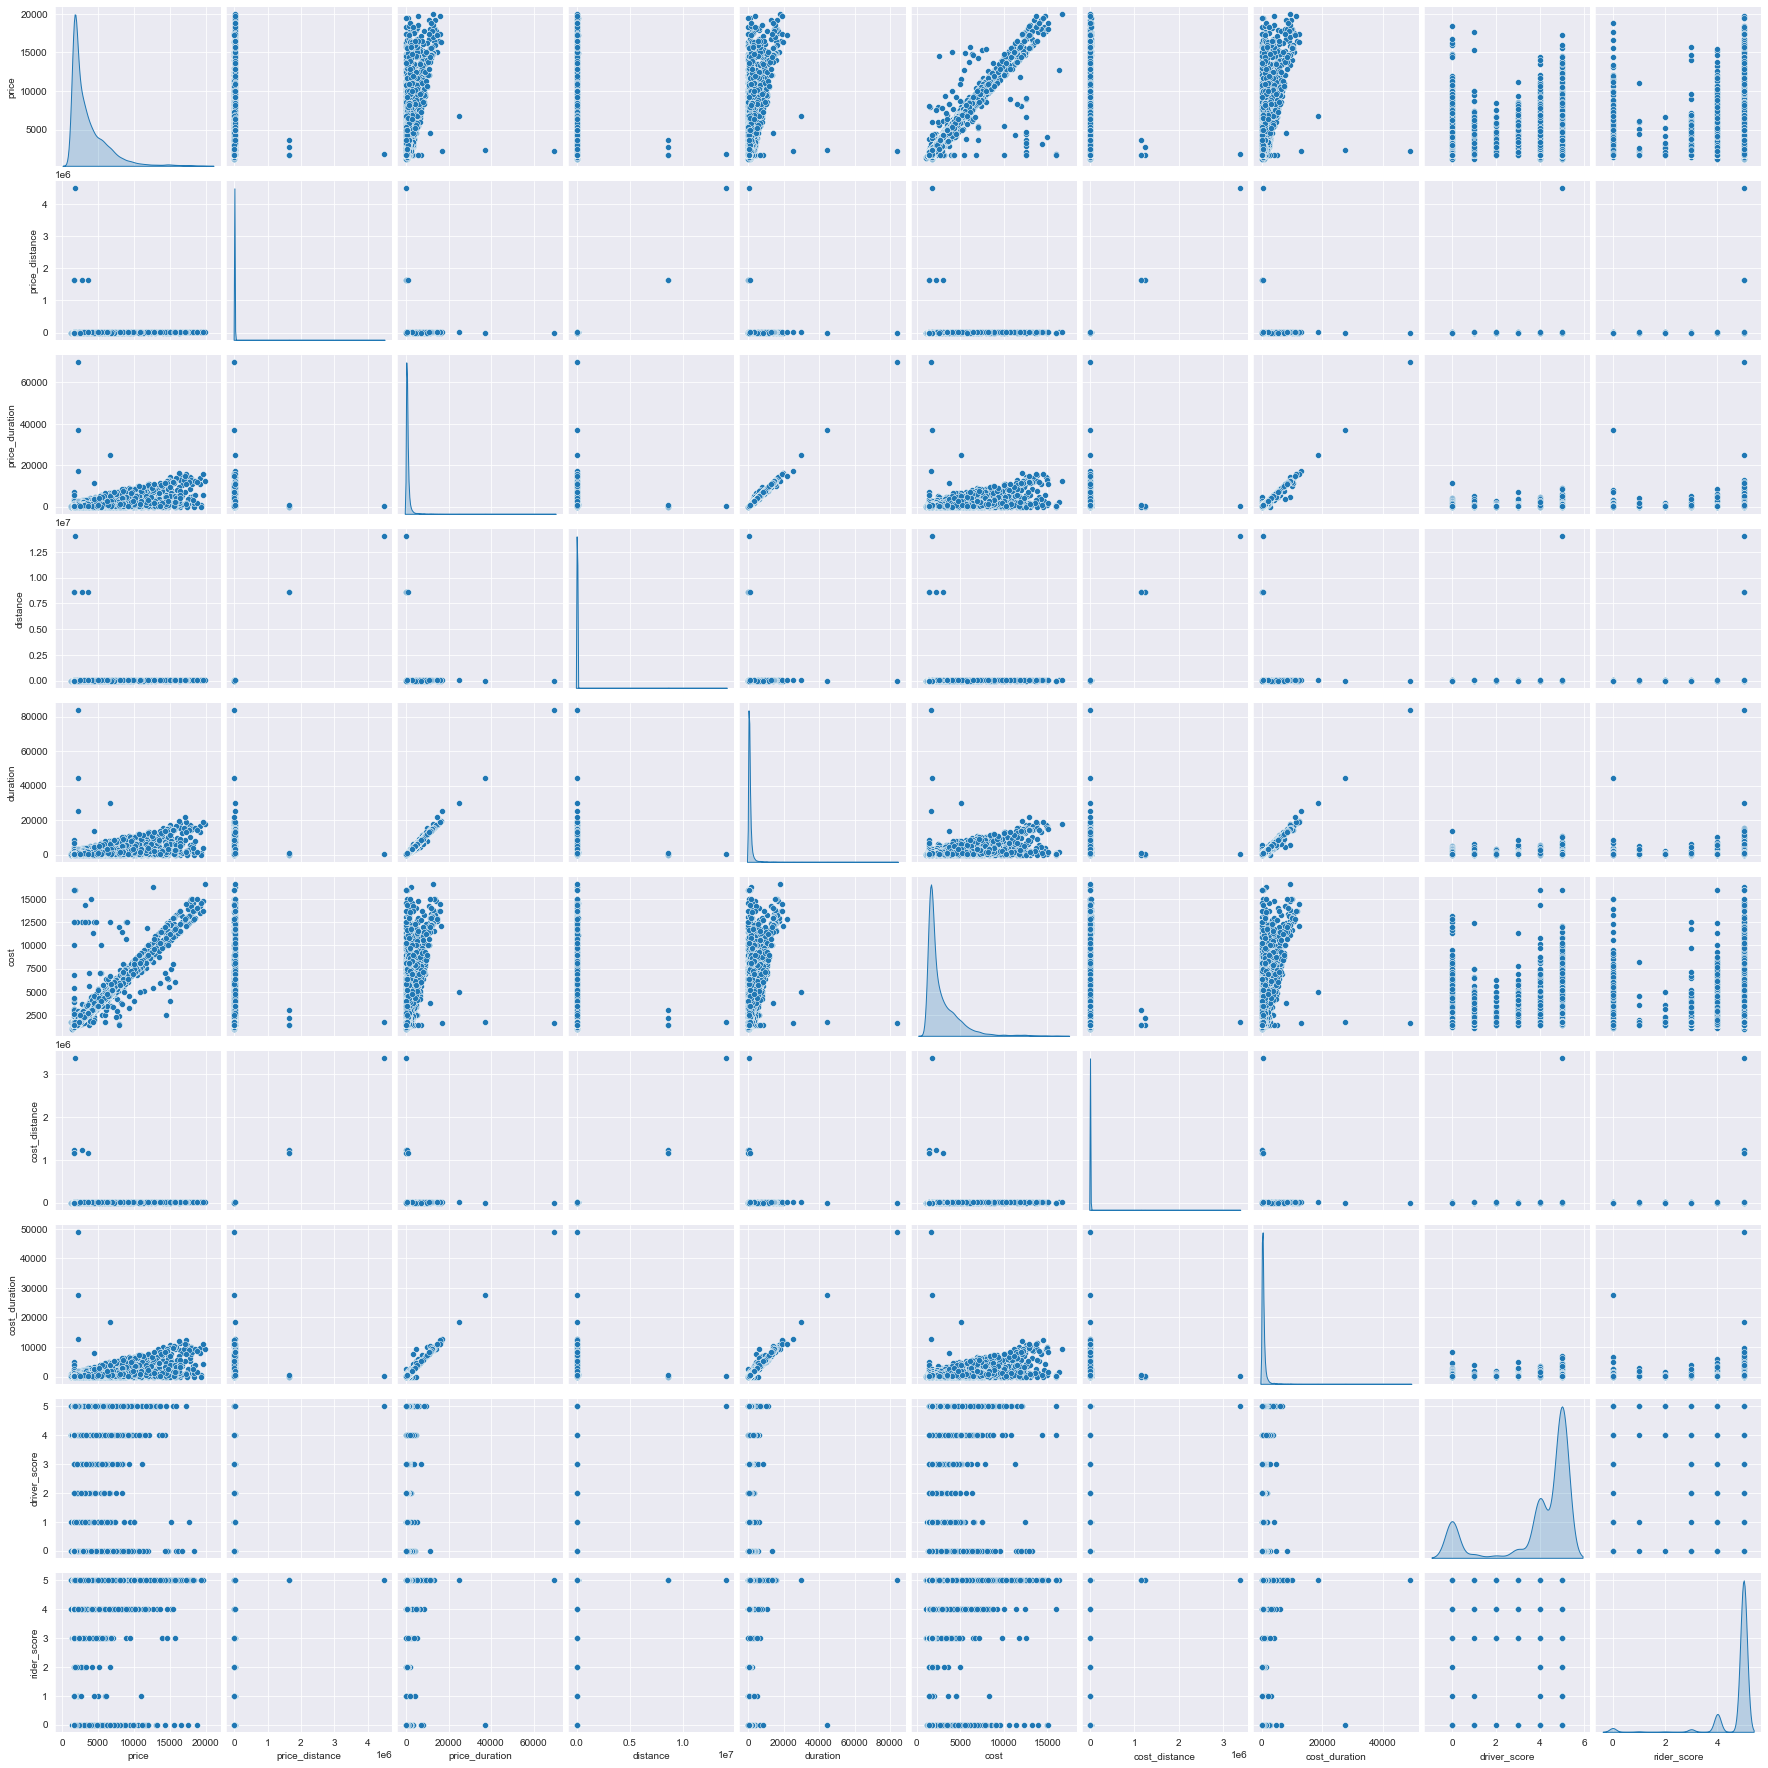

In [43]:
columnas= list(df_fix.select_dtypes(include=['int64','float64']))
sns.pairplot(df_fix[columnas],diag_kind='kde')
plt.show()

Observamos varios tipos de gráficos entre las cuales podemos observar no hay relación lineal, histogramas, rectas ,etc.

In [47]:
sns.pairplot(df_fix[columnas],diag_kind='kde')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Asignaremos una nueva columna para distinguir a los tipos de celulares y su influencia en la grafica de arriba <br>
iPhone :1 <br>
web:2<br>
Android:3<br>
otros:4<br>

In [ ]:
np.where(consumption_energy > 400, 'high', 
         (np.where(consumption_energy < 200, 'low', 'medium')))

In [60]:
df_fix['source_num']=np.where(df_fix['source']=='iPhone',1,
                              (np.where(df_fix['source']=='web', 2, 
                                        (np.where(df_fix['source']=='Android', 3, 4)))))

In [64]:
df_fix['source_num'].dtype

dtype('int32')

In [65]:
# Como la columna es int32 debemos incluirlo
columnas= list(df_fix.select_dtypes(include=['int64','float64','int32']))

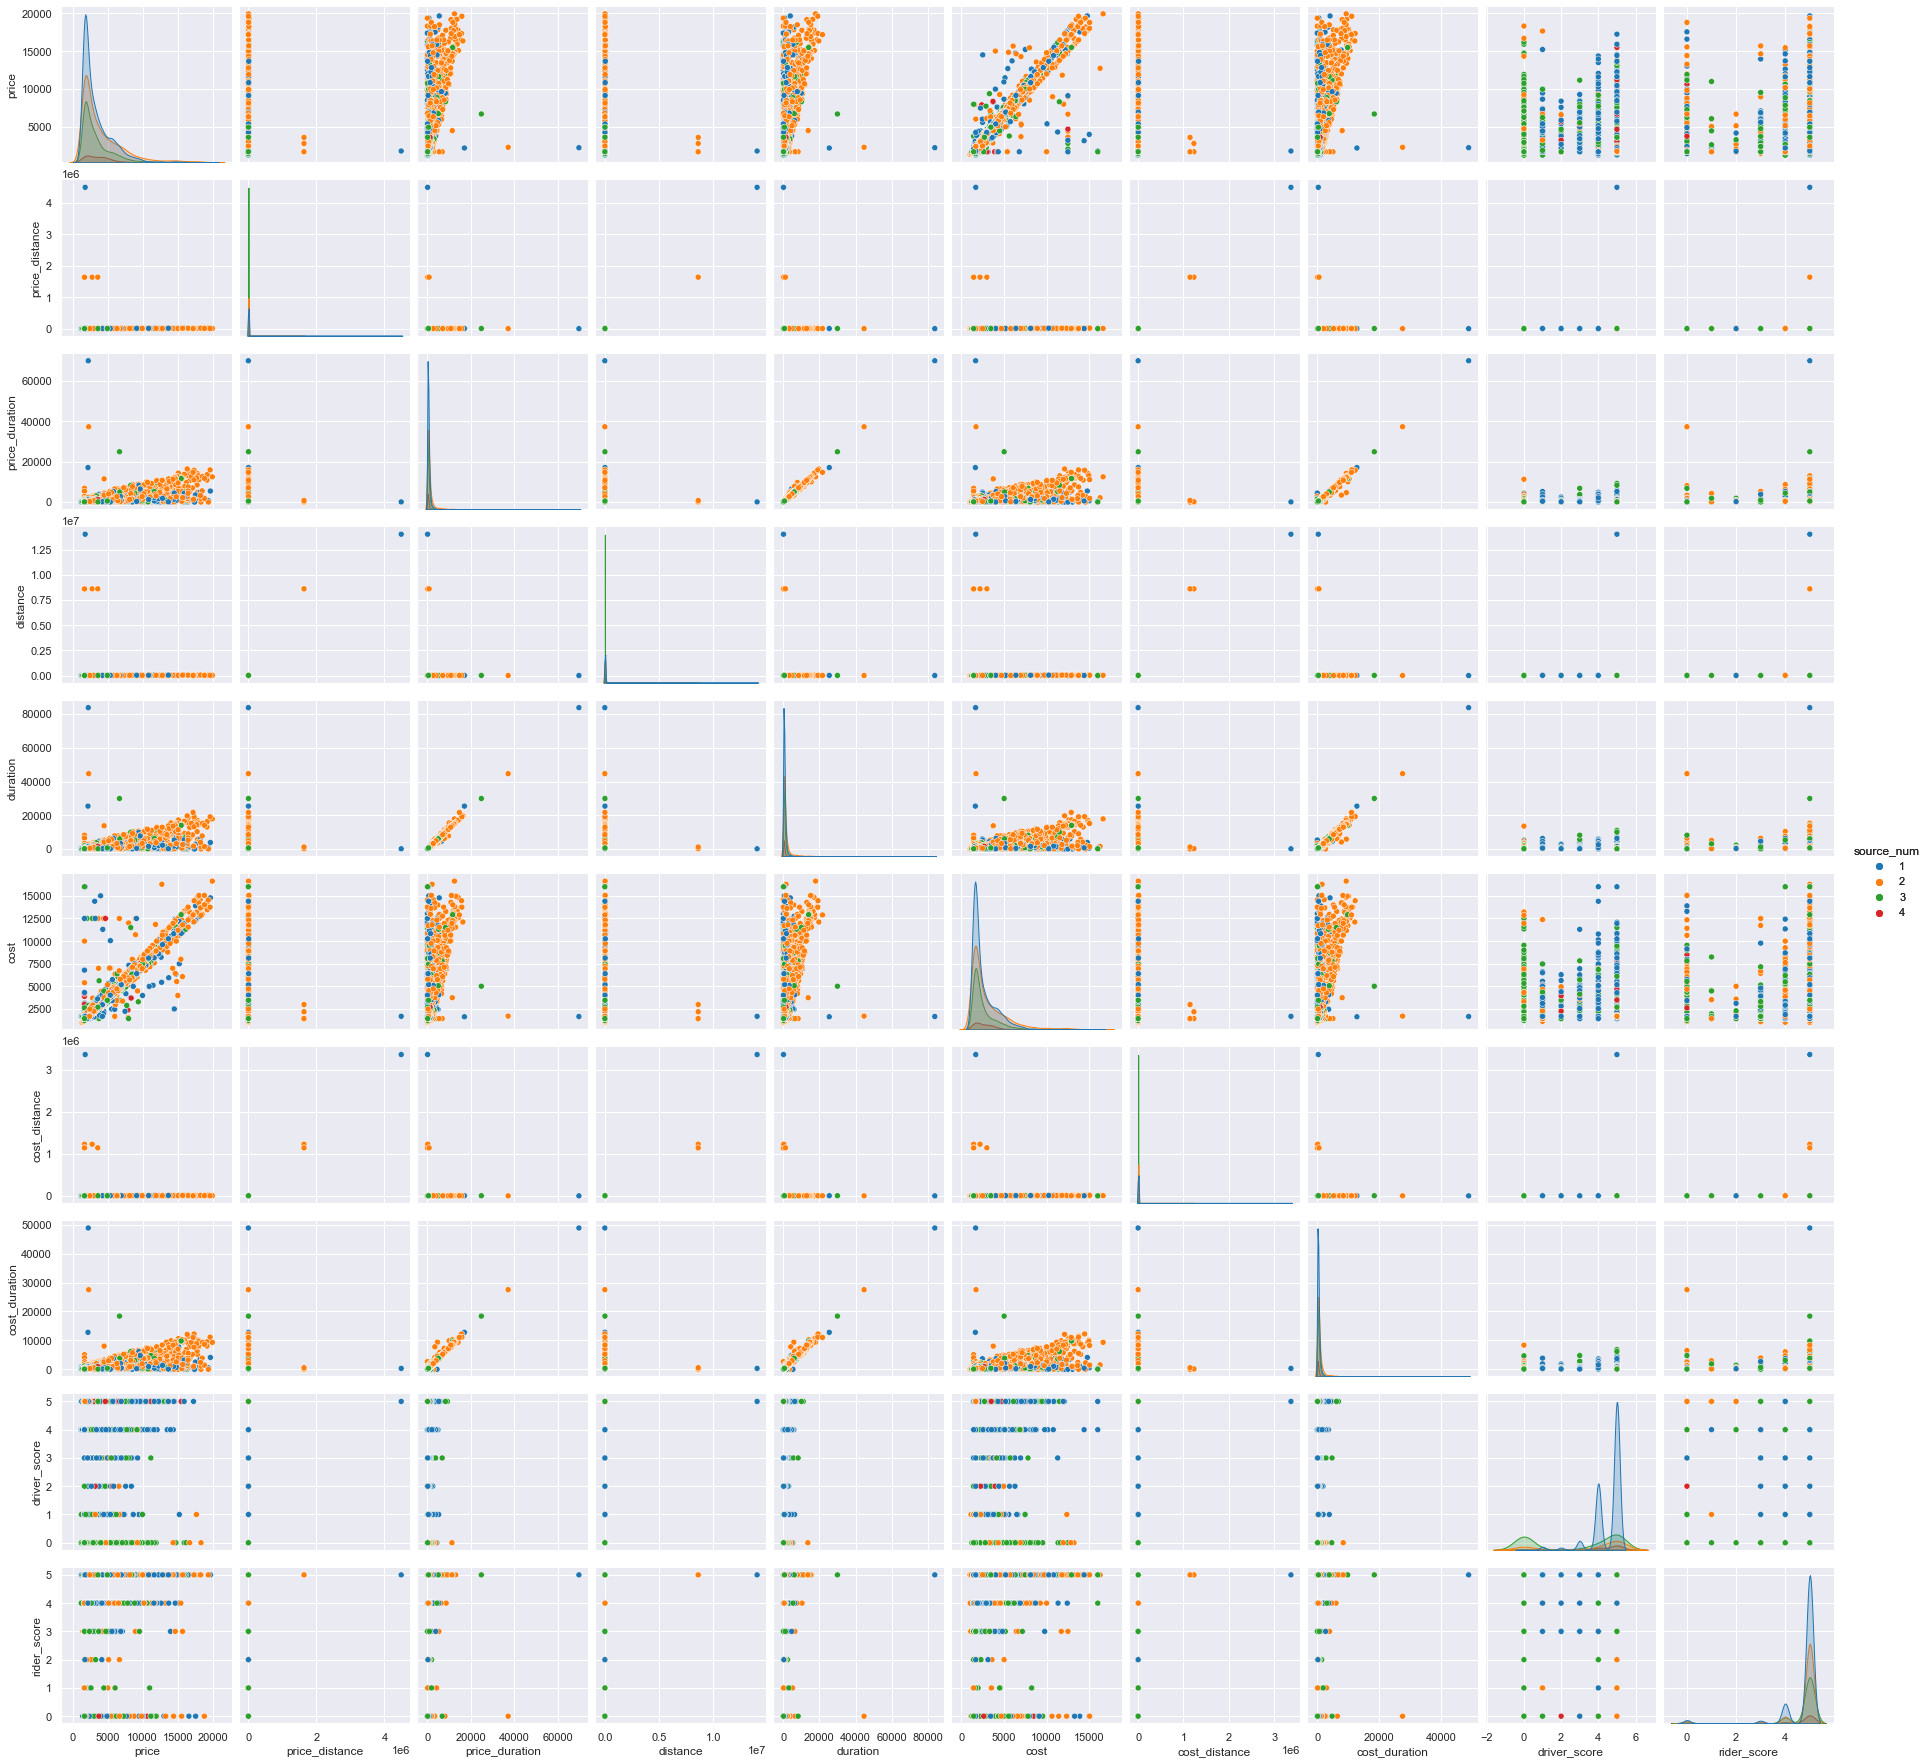

In [71]:

sns.pairplot(df_fix[columnas],diag_kind='kde',hue='source_num',palette='tab10').add_legend()
plt.show()

## Vamos a responder algunas preguntas que nos podemos hacer del nuevo dataframe, en el caso amerite mas limpieza de datos lo realizaremos en el momento

#### Cuantos taxis,pasajeros y conductores existen?


Conductores

In [24]:
conductores=df_fix[df_fix['driver_id'].notnull()]['driver_id'].unique().shape[0]
conductores

153

Pasajeros

In [25]:
pasajeros=df_fix[df_fix['user_id'].notnull()]['user_id'].unique().shape[0]
pasajeros

1126

Taxis

In [26]:
taxis=df_fix[df_fix['taxi_id'].notnull()]['taxi_id'].unique().shape[0]
taxis

181

#### Cuanto es el costo y precio promedio?


Costo promedio

In [27]:
costo=df_fix['cost'].mean()
costo

2817.6944836232565

Precio promedio

In [28]:
precio=df_fix['price'].mean()
precio

3639.5174737501957

Ganancia<br>
La ganancia promedia sería simplemente la resta del precio promedio menos el costo promedio

In [29]:
ganancia=precio-costo
ganancia

821.8229901269392

Que tanto demoran los viajes en promedio?
Para este caso hay que considerar que los viajes duren como mínimo 5 minutos y 2 horas, debido a que hay valores 0 en el dataframe

In [30]:
df_duration=df_fix[df_fix['duration']>300]
df_duration=df_duration[df_duration['duration']<7200]
df_duration['duration']=df_duration['duration']/60


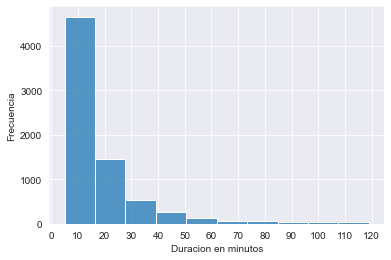

In [31]:
fig, ax = plt.subplots()
sns.histplot(df_duration['duration'],bins=10)
ax.set_xticks(range(0,121,10))
ax.set_xlabel("Duracion en minutos")
ax.set_ylabel("Frecuencia")
plt.show()

## Duración promedio de viaje en minutos

In [32]:
tiempo_pro=df_duration['duration'].mean()
tiempo_pro

18.074017857142852

## Cualos son los tipos de viajes

In [33]:
df_celulares=df_price.groupby(['source'])['source'].count()
df_celulares



source
Android    2410
Wap          77
iPad        320
iPhone     5331
web        4573
Name: source, dtype: int64

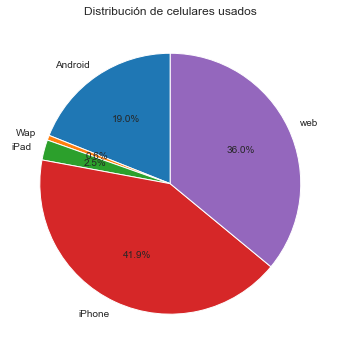

In [34]:
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df_celulares,labels=df_celulares.index,startangle=90,autopct="%.1f%%")
plt.title('Distribución de celulares usados')
plt.show()

## Distribución de viajes por mes

Primero convertimos el tipo de dato object a datetime para extraer su mes

In [35]:
df_months=df_price['start_at']

In [36]:
df_months=df_months.to_frame()

In [37]:
#df_months['start_at'] = pd.to_datetime(df_months.start_at
df_months['start_at'] = pd.to_datetime(df_months['start_at'])

In [38]:
#Cambió el tipo de dato
df_months['start_at']

4       2010-11-09 23:55:00
5       2010-10-08 13:00:00
6       2010-08-08 12:10:00
7       2010-05-16 03:58:00
8       2010-09-07 05:56:00
                ...        
23102   2010-05-25 09:48:00
23104   2010-04-04 17:00:00
23105   2010-01-15 20:09:00
23108   2010-09-21 09:56:00
23109   2010-04-29 04:30:00
Name: start_at, Length: 12762, dtype: datetime64[ns]

In [39]:
df_months['month'] = df_months['start_at'].dt.month_name(locale = 'Spanish')


In [40]:
#Obtuvimos los meses de la fecha
df_months

,start_at,month
4,2010-11-09 23:55:00,Noviembre
5,2010-10-08 13:00:00,Octubre
6,2010-08-08 12:10:00,Agosto
7,2010-05-16 03:58:00,Mayo
8,2010-09-07 05:56:00,Septiembre
...,...,...
23102,2010-05-25 09:48:00,Mayo
23104,2010-04-04 17:00:00,Abril
23105,2010-01-15 20:09:00,Enero
23108,2010-09-21 09:56:00,Septiembre


In [41]:
graph_month=df_months.groupby(['month'])['month'].count()
graph_month

month
Abril          952
Agosto        1121
Diciembre     1515
Enero          669
Febrero        612
Julio          788
Junio          895
Marzo          804
Mayo          1085
Noviembre     1611
Octubre       1388
Septiembre    1322
Name: month, dtype: int64

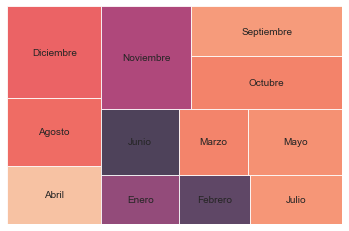

In [42]:
squarify.plot(sizes=graph_month, label=graph_month.index, alpha=.8 )
plt.axis('off')
plt.show()